In [1]:
import pandas as pd
import geopandas
cell_geo = pd.read_pickle("./dataframes/cell_geometry")
cell = geopandas.GeoDataFrame(cell_geo, columns=['geometry'], 
                                 crs='epsg:4326')

In [3]:
linear_interpolation_log = pd.read_pickle("./dataframes/linear_interpolation_log")
linear_interpolation_normal = pd.read_pickle("./dataframes/linear_interpolation_normal")
cubic_interpolation_log = pd.read_pickle("./dataframes/cubic_interpolation_log")
cubic_interpolation_normal = pd.read_pickle("./dataframes/cubic_interpolation_normal")
idw_interpolation_log = pd.read_pickle("./dataframes/idw_interpolation_log")
idw_interpolation_normal = pd.read_pickle("./dataframes/idw_interpolation_normal")
kriging_kernel_none_log = pd.read_pickle("./dataframes/kriging_kernel_none_log")
kriging_kernel_none_normal = pd.read_pickle("./dataframes/kriging_kernel_none_normal")
kriging_kernel_RBF_1_log = pd.read_pickle("./dataframes/kriging_kernel_RBF_1_log")
kriging_kernel_RBF_1_normal = pd.read_pickle("./dataframes/kriging_kernel_RBF_1_normal")

,geometry,interpolated_value
421837,"POLYGON ((-116.97101 32.55072, -116.95652 32.5...",NaN
420317,"POLYGON ((-117.00000 32.55072, -116.98551 32.5...",NaN
418797,"POLYGON ((-117.02899 32.55072, -117.01449 32.5...",NaN
418037,"POLYGON ((-117.04348 32.55072, -117.02899 32.5...",NaN
419557,"POLYGON ((-117.01449 32.55072, -117.00000 32.5...",NaN
...,...,...
215769,"POLYGON ((-120.91304 41.99340, -120.89855 41.9...",24303.899555
212729,"POLYGON ((-120.97101 41.99297, -120.95805 41.9...",12747.236104
218809,"POLYGON ((-120.85507 41.99364, -120.84058 41.9...",35129.428387
237049,"POLYGON ((-120.50725 41.99356, -120.50107 41.9...",63017.283438


In [8]:
jsonfile = ('/Users/christopher/Downloads/ark28722-s73w23-geojson.json')
world = geopandas.read_file(jsonfile)
import matplotlib.colors as colors

def plotter(dataset):
    cell["interpolated_value"] = dataset
    ax = cell.plot(column='interpolated_value', figsize=(12, 8), cmap='plasma', legend=True)
    world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))
def log_plotter(dataset):
    cell["interpolated_value"] = dataset
    ax = cell.plot(column='interpolated_value', figsize=(12, 8), cmap='plasma', norm=colors.SymLogNorm(vmin=cell["interpolated_value"].min(), vmax=cell["interpolated_value"].max(), linthresh = 0.02), legend=True)
    world.to_crs(cell.crs).plot(ax = ax, color = "none", edgecolor = 'black', figsize = (12,8))

<IPython.core.display.Javascript object>


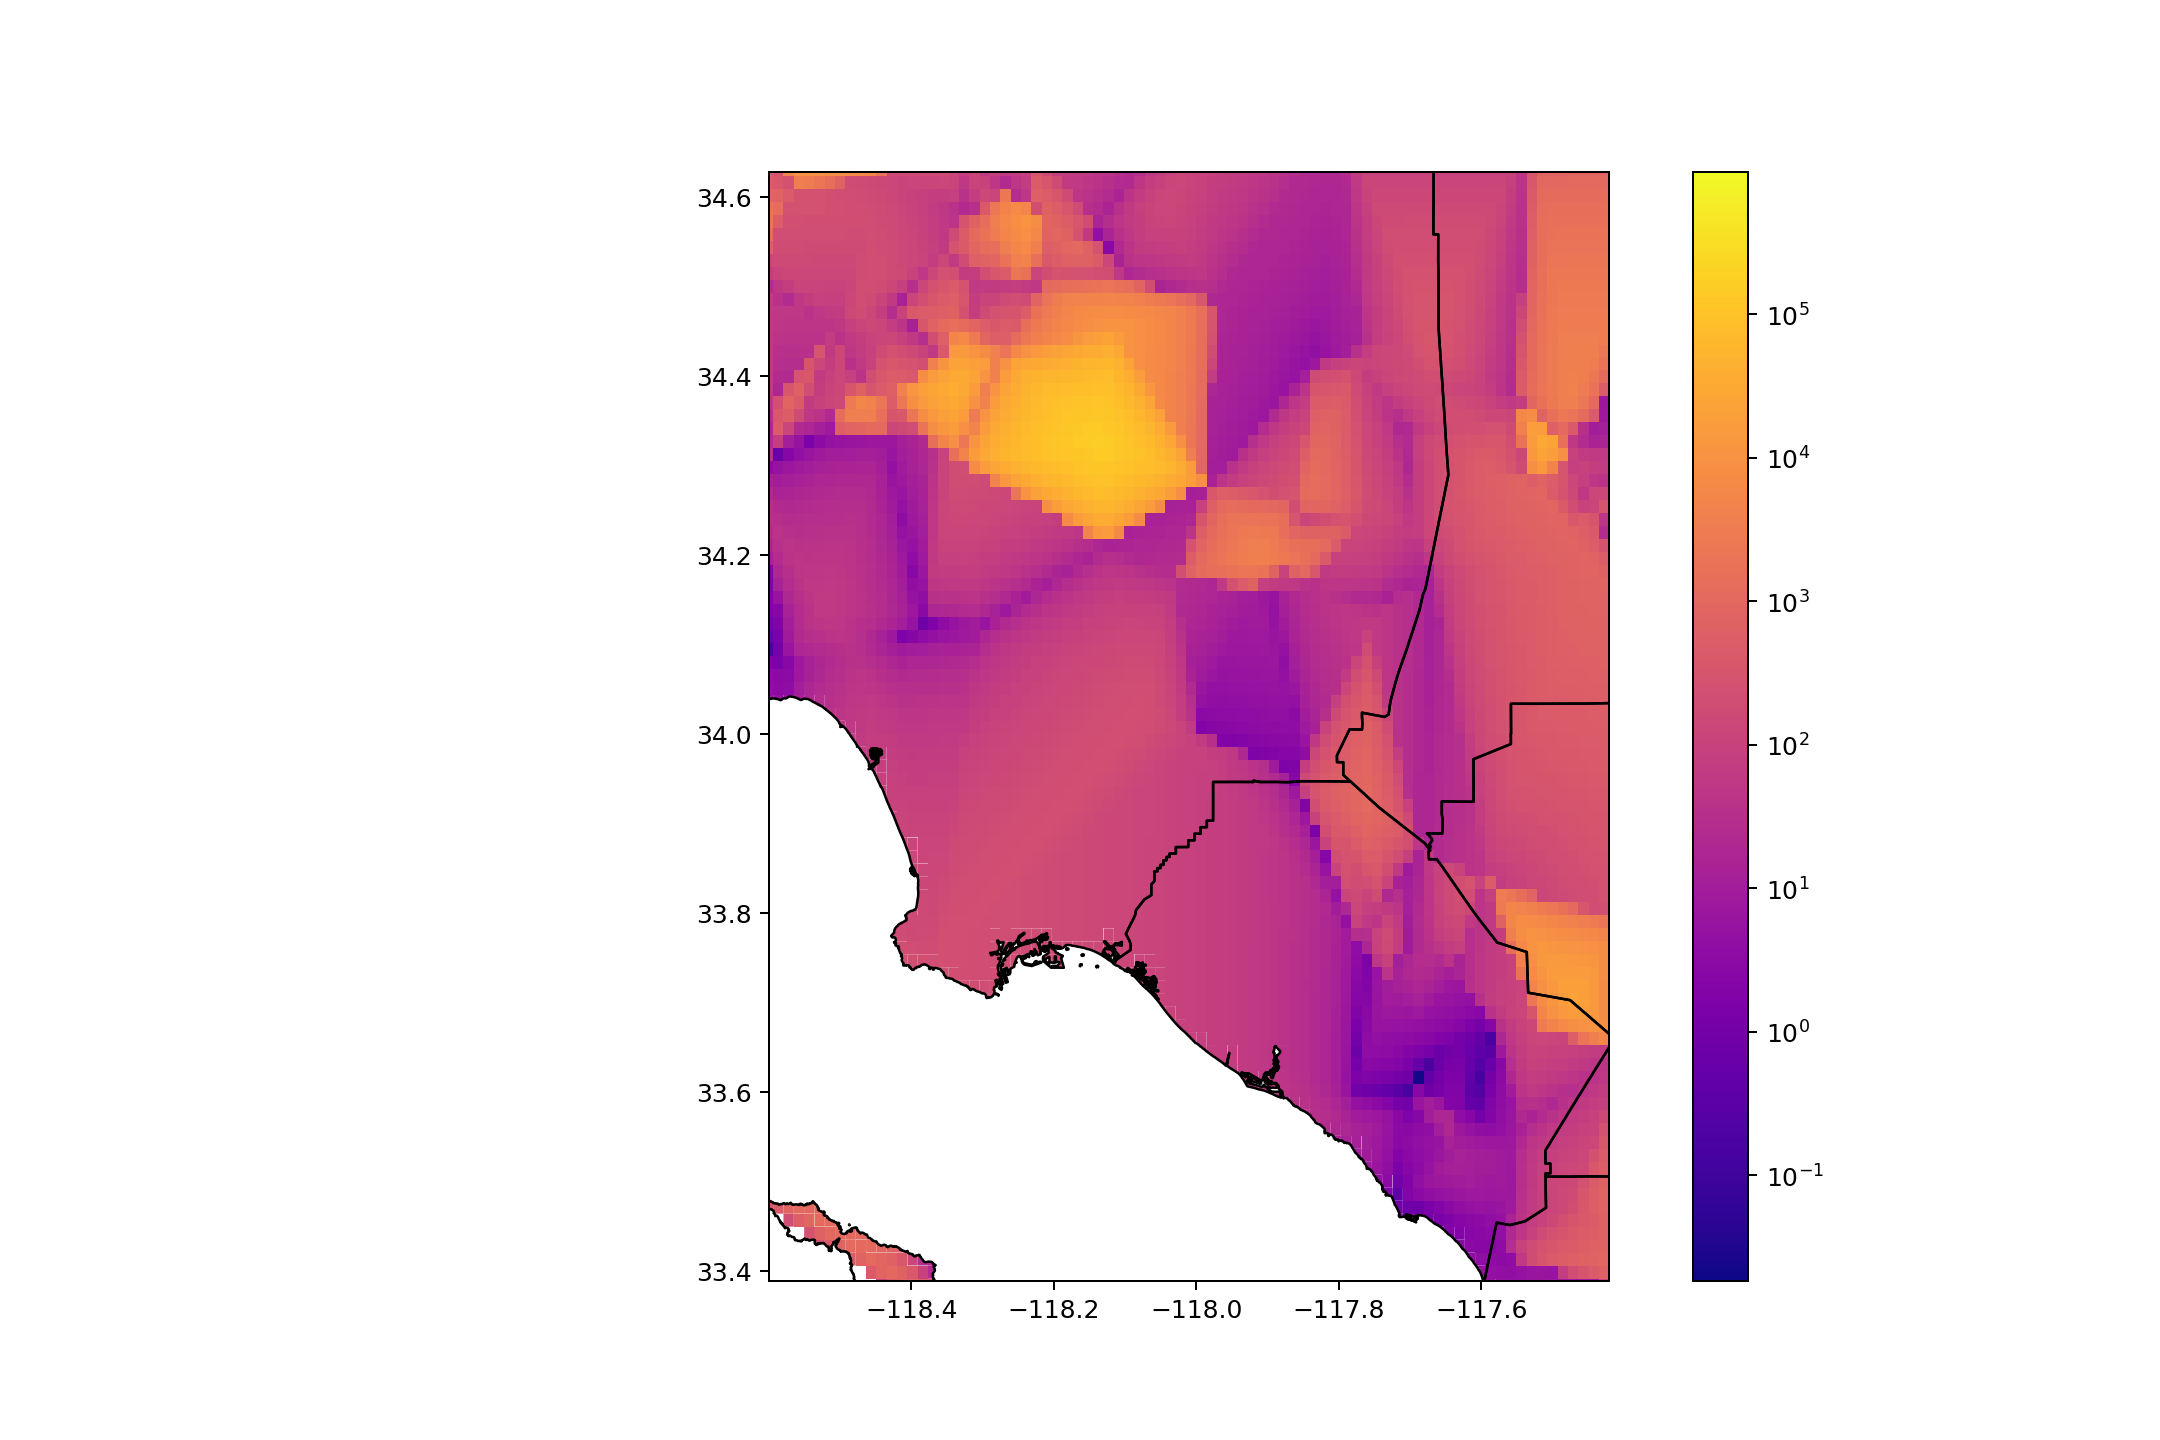

In [27]:
%matplotlib notebook
log_plotter(linear_interpolation_normal)

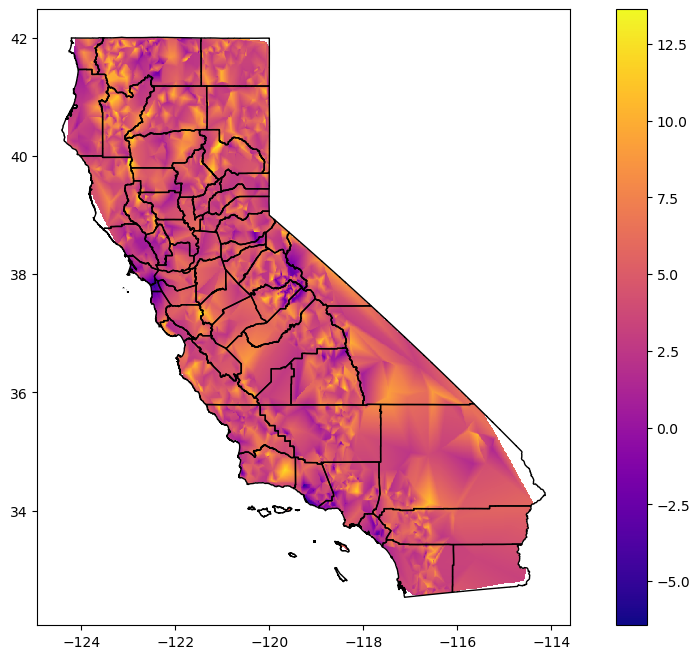

In [6]:
plotter(linear_interpolation_log)

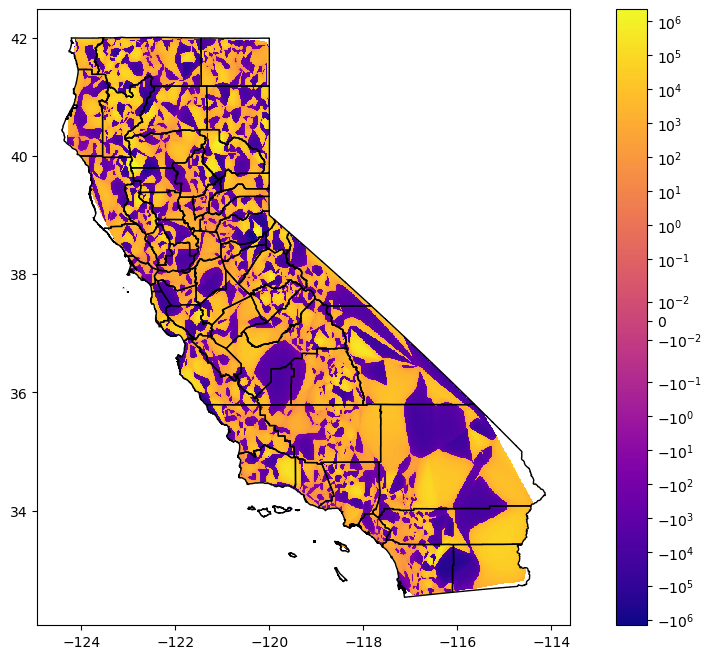

In [18]:
log_plotter(cubic_interpolation_normal)

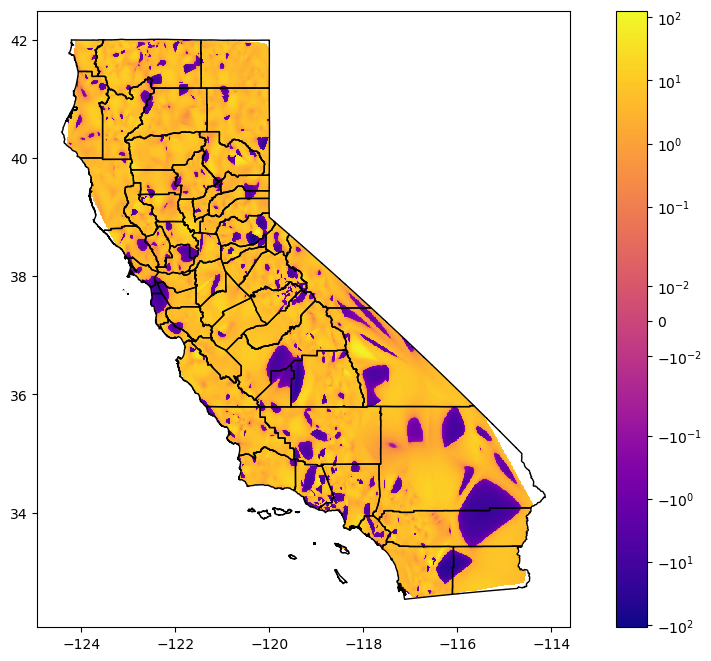

In [19]:
log_plotter(cubic_interpolation_log)

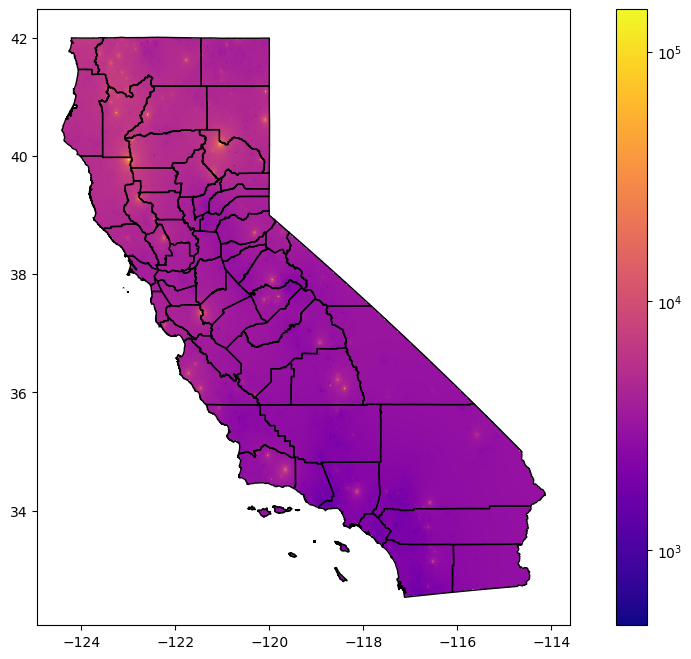

In [20]:
log_plotter(idw_interpolation_normal)

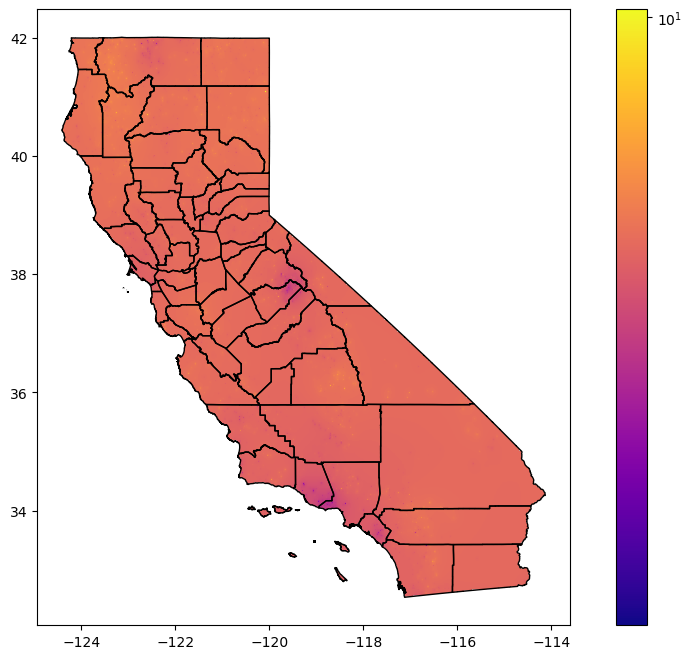

In [21]:
log_plotter(idw_interpolation_log)

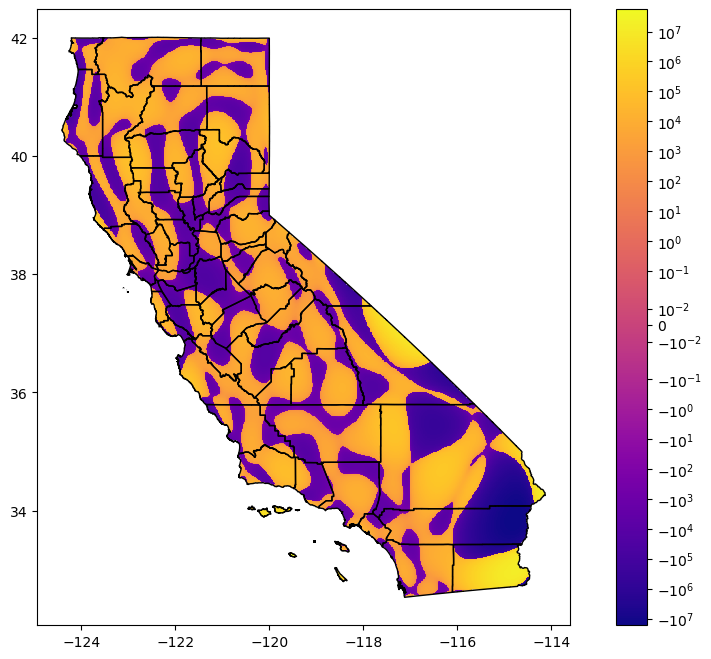

In [22]:
log_plotter(kriging_kernel_none_normal)

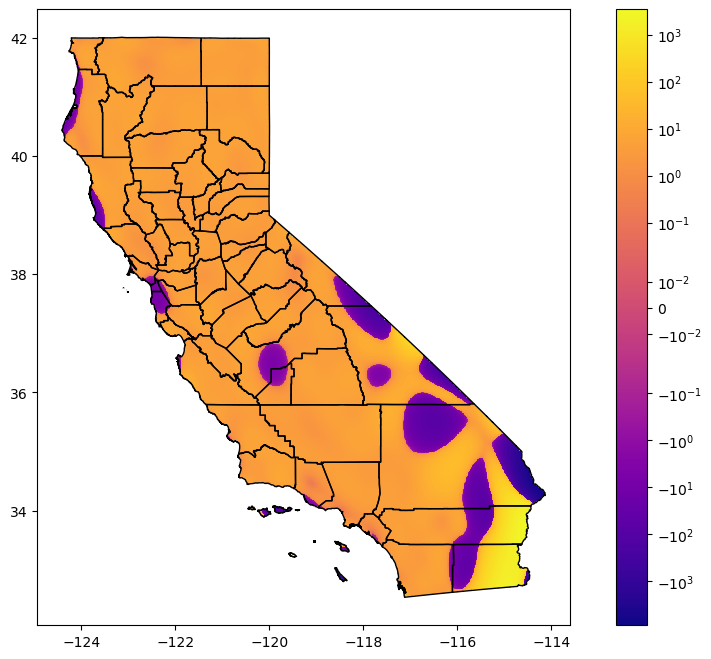

In [23]:
log_plotter(kriging_kernel_none_log)

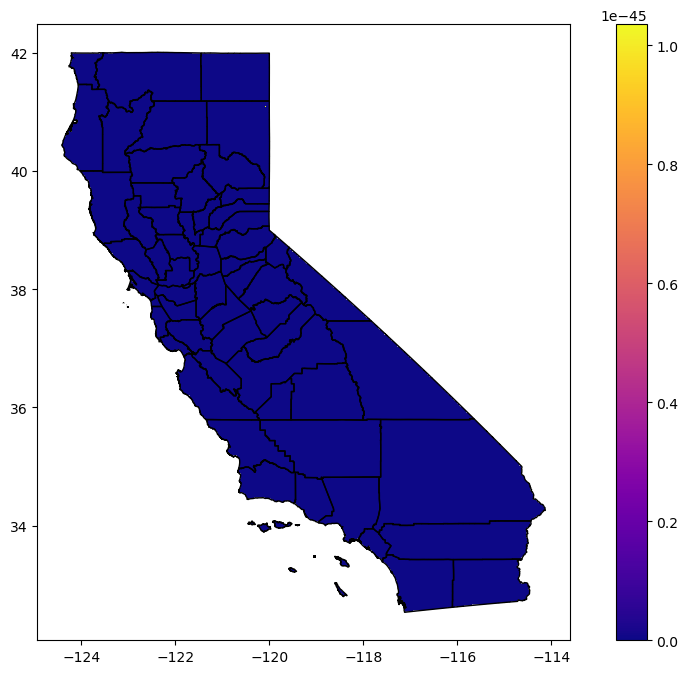

In [26]:
plotter(kriging_kernel_RBF_1_normal)

/Users/christopher/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:955: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.get_figure().colorbar(n_cmap, **legend_kwds)


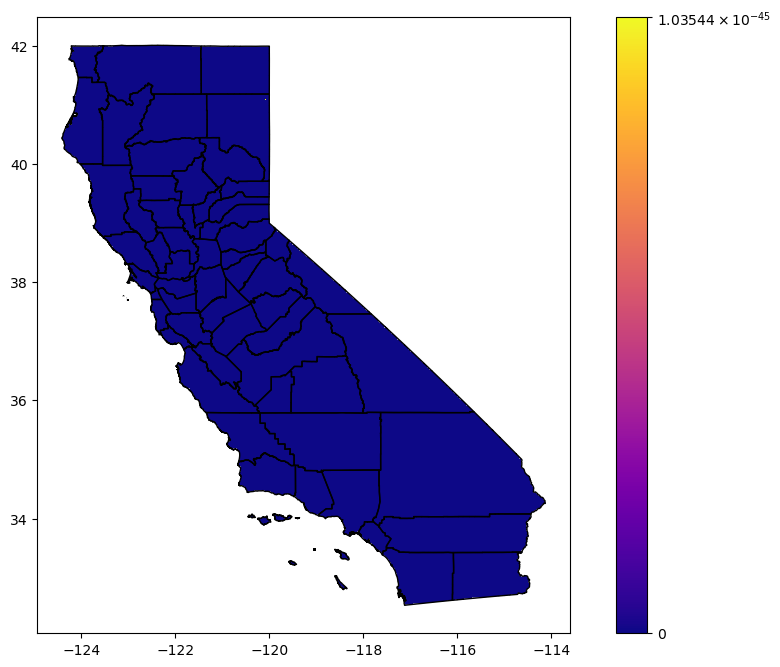

In [25]:
log_plotter(kriging_kernel_RBF_1_log)